# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PIAIC-ASSIGNMENTS/DLAssignments/Data

/content/drive/MyDrive/PIAIC-ASSIGNMENTS/DLAssignments/Data


In [ ]:
print(CarData.columns)

In [ ]:
CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **2. Checking for missing values**

In [ ]:
CarData.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#No missing Values
#Removing Unnecessary values

In [ ]:
CarData.drop(columns=['car_ID','CarName'], inplace=True)

In [ ]:
CarData

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#**One Hot Encoding**

In [ ]:
final_car=pd.get_dummies(CarData, columns=[	'symboling','fueltype','aspiration','cylindernumber','fuelsystem','doornumber','carbody','drivewheel','enginelocation','enginetype']) #Performing One Hot Encoding

In [ ]:
final_car

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


#**Normalizing Data**

In [ ]:
mean = final_car.iloc[:,0:14].mean(axis=0) # taking the mean of 
std = final_car.iloc[:,0:14].std(axis=0)

final_car.iloc[:,0:14] -= mean

final_car.iloc[:,0:14] /= std

In [ ]:
final_car=final_car.astype(np.float64)

#Train Test Split
#Separating Price Columns

In [ ]:
trainData,testData=train_test_split(final_car, test_size=0.3, random_state=11)


In [ ]:
print(trainData.shape,testData.shape)

(143, 58) (62, 58)


In [ ]:
train_Data_Input=trainData.drop(columns=['price'])
train_Data_Result=trainData['price']
test_Data_Input=testData.drop(columns=['price'])
test_Data_Result=testData['price']



In [ ]:
print(final_car)

     wheelbase  carlength  ...  enginetype_ohcv  enginetype_rotor
0    -1.686643  -0.425480  ...              0.0               0.0
1    -1.686643  -0.425480  ...              0.0               0.0
2    -0.706865  -0.230948  ...              1.0               0.0
3     0.173274   0.206750  ...              0.0               0.0
4     0.106848   0.206750  ...              0.0               0.0
..         ...        ...  ...              ...               ...
200   1.717669   1.195622  ...              0.0               0.0
201   1.717669   1.195622  ...              0.0               0.0
202   1.717669   1.195622  ...              1.0               0.0
203   1.717669   1.195622  ...              0.0               0.0
204   1.717669   1.195622  ...              0.0               0.0

[205 rows x 58 columns]


#Preparing For Model

In [ ]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.optimizers import Adam, SGD
 from keras import regularizers

In [ ]:
def Build_Model_Simple(act,inputShape):
  model = Sequential()
  model.add(Dense(10, activation= act,input_shape=(inputShape,)))
  model.add(Dense(8, activation= act))
  model.add(Dense(6, activation= act))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

def build_model_regular(act,inputShape):
  model = Sequential()
  model.add(Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(inputShape,)))
  model.add(Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model



In [ ]:
final_car

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.027324,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0.403473,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,0.403473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,0.084279,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,0.522389,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,0.446659,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,0.722042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,1.027468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725,1.150765,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## **K-Fold**

In [ ]:
k=4
num_of_val_samples=len(train_Data_Input) // k
epoch=100
all_score=[]
all_mae_history=[]
for i in range(k):
  print('processing fold #', i)
  val_data_Input=train_Data_Input[i*num_of_val_samples:(i+1)*num_of_val_samples]
  val_data_Result=train_Data_Result[i*num_of_val_samples:(i+1)*num_of_val_samples]
  partial_train_Data_Input=np.concatenate([train_Data_Input[:i * num_of_val_samples],train_Data_Input[(i + 1) * num_of_val_samples:]],  axis=0)
  partial_train_Data_Result=np.concatenate([train_Data_Result[:i * num_of_val_samples],train_Data_Result[(i + 1) * num_of_val_samples:]],  axis=0)
  Simple_relu_Model=Build_Model_Simple('relu',57)
  Simple_tanh_Model=Build_Model_Simple('tanh',57)
  ReluHistory=Simple_relu_Model.fit(partial_train_Data_Input,partial_train_Data_Result, epochs=100,batch_size=1,verbose=0)
  val_mse,val_mae=Simple_relu_Model.evaluate(val_data_Input,val_data_Result,verbose=0)
  mae_history=ReluHistory.history['mae']
  all_score.append(val_mae)
  all_mae_history.append(mae_history)





processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history=[np.mean([x[i] for x in all_mae_history]) for i in range(num_of_val_samples)]
print("All fold Validation Error : ",all_score)
print("Mean of all fold validation error", np.mean(all_score))
print("average mae history", average_mae_history)

All fold Validation Error :  [0.40491771697998047, 0.1762300431728363, 0.29125332832336426, 0.2010512351989746]
Mean of all fold validation error 0.2683630809187889
average mae history [0.6923622637987137, 0.5200955867767334, 0.4050600305199623, 0.34819404780864716, 0.32116973772644997, 0.3018670231103897, 0.28323032706975937, 0.2658991925418377, 0.2545226626098156, 0.23675531893968582, 0.22610635682940483, 0.22041621059179306, 0.2096647247672081, 0.19897104054689407, 0.19458024576306343, 0.18835541605949402, 0.17909715697169304, 0.17748185247182846, 0.16785970143973827, 0.16429918818175793, 0.15842781588435173, 0.15363979898393154, 0.15087694115936756, 0.14939672127366066, 0.14760890044271946, 0.14592889323830605, 0.13871947675943375, 0.14090045541524887, 0.13462836854159832, 0.13010113313794136, 0.13043740391731262, 0.12672702223062515, 0.12673259899020195, 0.12070556730031967, 0.11831670626997948]


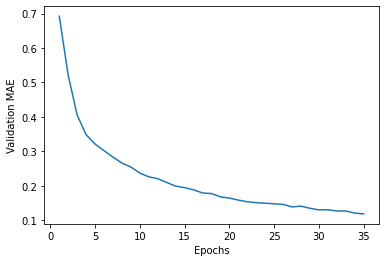

In [ ]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

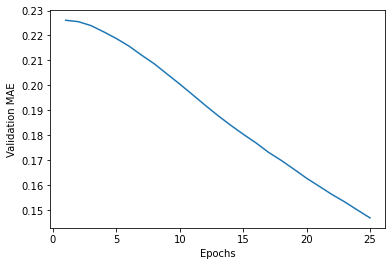

In [ ]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point) 
  return smoothed_points
smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
Modified_Simple_relu_Model=Build_Model_Simple('relu',57)
Modified_Simple_relu_Model.fit(train_Data_Input,train_Data_Result,epochs=25, batch_size=20, verbose=0 )
CalcVal=Modified_Simple_relu_Model.predict(test_Data_Input)

In [ ]:
print()

[-0.74199776 -0.17921355  0.40535102 -0.79344445 -0.86366731 -0.27897757
  0.66884318  0.42788242 -0.74875718 -0.26007623  1.15076472 -0.73623974
 -0.74825649 -0.82386184  1.41300514 -0.50041112  3.50967677 -0.33568158
 -0.68566927  0.02732425  0.4034734  -0.66113509 -0.63685125 -0.76991166
  0.27955072  0.34063584 -0.19811489 -0.82423736 -0.84464079  2.40976909
  0.08427862 -0.04152168 -0.03914337 -0.82423736 -0.70945241  2.59753073
  0.28831293  0.02782495 -0.45534833 -0.41516734  0.22071874 -0.8113444
  0.41073352 -0.85089951 -0.31064669 -0.38537583  0.45667253 -0.29187053
 -0.49840833 -0.7608991  -0.54171868 -0.36697519 -0.673277   -0.59854787
 -0.41078623 -0.66063439 -0.8872001  -0.99247179 -0.21050715  0.57360635
 -0.46799095 -0.41153728]


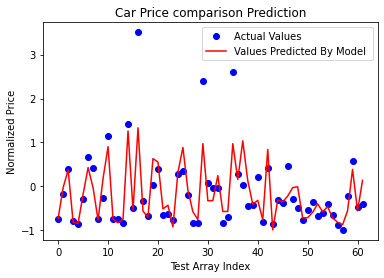

In [ ]:
ActualValue=np.array(test_Data_Result.array)
DataIndex=range(62)

plt.plot (DataIndex,ActualValue, 'bo',label='Actual Values')
plt.plot(DataIndex,CalcVal, 'r-',label='Values Predicted By Model ')
plt.legend()
plt.xlabel('Test Array Index')
plt.ylabel('Normalized Price')
plt.title('Car Price comparison Prediction')
plt.show()

